In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


data = pd.read_csv('train.csv')

print(len(data))
print(data.shape)


print(data.columns)
print(len(data.columns))

correlation_matrix = data.corr(numeric_only=True)['SalePrice']

print(correlation_matrix.sort_values(ascending=False))


data.head()

data.isna().sum().sort_values(ascending=False)[:20]



1460
(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
# good resource: https://www.kaggle.com/code/halee210/tutorial-house-price-prediction

In [ ]:
y_train = data['SalePrice']

columns_to_be_removed = ['Id', 'BsmtFinType2', 'MoSold', 'SalePrice']

data['Street'] = data['Street'].map({'Grvl': 0, 'Pave': 1})
data['Alley'] = data['Alley'].map({'Grvl': 0, 'Pave': 1, 'NA': 2})

lot_shape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
land_contour_map = {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}
utilities_map = {'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3}
land_slope_map = {'Gtl': 0, 'Mod': 1, 'Sev': 2}


mszoning_map = {
    'A': 0,  # Agriculture
    'C': 1,  # Commercial
    'FV': 2, # Floating Village Residential
    'I': 3,  # Industrial
    'RH': 4, # Residential High Density
    'RL': 5, # Residential Low Density
    'RP': 6, # Residential Low Density Park
    'RM': 7  # Residential Medium Density
}

foundation_map = {
    'BrkTil': 0,  # Brick & Tile
    'CBlock': 1,  # Cinder Block
    'PConc': 2,   # Poured Concrete
    'Slab': 3,    # Slab
    'Stone': 4,   # Stone
    'Wood': 5     # Wood
}


lot_config_map = {'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}
neighborhood_map = {
    'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6,
    'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'Names': 12, 'NoRidge': 13,
    'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20,
    'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24
}
condition_map = {
    'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5, 'PosA': 6, 'RRNe': 7, 'RRAe': 8
}
bldg_type_map = {'1Fam': 0, '2FmCon': 1, 'Duplx': 2, 'TwnhsE': 3, 'TwnhsI': 4}
house_style_map = {
    '1Story': 0, '1.5Fin': 1, '1.5Unf': 2, '2Story': 3, '2.5Fin': 4, '2.5Unf': 5, 'SFoyer': 6, 'SLvl': 7
}

# RoofStyle (Nominal)
roof_style_map = {
    'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5
}

# RoofMatl (Nominal)
roof_matl_map = {
    'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6, 'WdShngl': 7
}

# Exterior1st (Nominal)
exterior1st_map = {
    'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5, 'HdBoard': 6,
    'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13,
    'VinylSd': 14, 'Wd Sdng': 15, 'WdShing': 16
}

# Exterior2nd (Nominal)
exterior2nd_map = {
    'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5, 'HdBoard': 6,
    'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13,
    'VinylSd': 14, 'Wd Sdng': 15, 'WdShing': 16
}

# MasVnrType (Nominal)
mas_vnr_type_map = {
    'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 'None': 3, 'Stone': 4
}

exter_type_map = {
    'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
}

# GarageType (Nominal)
garage_type_map = {
    '2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'NA': 6
}

# BsmtExposure (Nominal)
bsmt_exposure_map = {
    'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3, 'NA': 4
}

# BsmtFinType1 (Nominal)
bsmt_fin_type1_map = {
    'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'NA': 6
}

# Heating (Nominal)
heating_map = {
    'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5
}

# CentralAir (Binary)
central_air_map = {
    'N': 0, 'Y': 1
}

# Electrical (Nominal)
electrical_map = {
    'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4
}

# Functional (Ordinal)
functional_map = {
    'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7
}

# GarageFinish (Nominal)
garage_finish_map = {
    'Fin': 0, 'RFn': 1, 'Unf': 2, 'NA': 3
}

# PavedDrive (Ordinal)
paved_drive_map = {
    'Y': 2, 'P': 1, 'N': 0
}

# Fence (Nominal)
fence_map = {
    'GdPrv': 0, 'MnPrv': 1, 'GdWo': 2, 'MnWw': 3, 'NA': 4
}

# MiscFeature (Nominal)
misc_feature_map = {
    'Elev': 0, 'Gar2': 1, 'Othr': 2, 'Shed': 3, 'TenC': 4, 'NA': 5
}

# SaleType (Nominal)
sale_type_map = {
    'WD': 0, 'CWD': 1, 'VWD': 2, 'New': 3, 'COD': 4, 'Con': 5, 'ConLw': 6, 'ConLI': 7,
    'ConLD': 8, 'Oth': 9
}

# SaleCondition (Nominal)
sale_condition_map = {
    'Normal': 0, 'Abnorml': 1, 'AdjLand': 2, 'Alloc': 3, 'Family': 4, 'Partial': 5
}

# Apply maps
data['MSZoning'] = data['MSZoning'].map(mszoning_map)
data['LotShape'] = data['LotShape'].map(lot_shape_map)
data['LandContour'] = data['LandContour'].map(land_contour_map)
data['Utilities'] = data['Utilities'].map(utilities_map)
data['LandSlope'] = data['LandSlope'].map(land_slope_map)
data['LotConfig'] = data['LotConfig'].map(lot_config_map)
data['Neighborhood'] = data['Neighborhood'].map(neighborhood_map)
data['Condition1'] = data['Condition1'].map(condition_map)
data['Condition2'] = data['Condition2'].map(condition_map)
data['BldgType'] = data['BldgType'].map(bldg_type_map)
data['HouseStyle'] = data['HouseStyle'].map(house_style_map)
data['RoofStyle'] = data['RoofStyle'].map(roof_style_map)
data['RoofMatl'] = data['RoofMatl'].map(roof_matl_map)
data['Exterior1st'] = data['Exterior1st'].map(exterior1st_map)
data['Exterior2nd'] = data['Exterior2nd'].map(exterior2nd_map)
data['MasVnrType'] = data['MasVnrType'].map(mas_vnr_type_map)
data['ExterQual'] = data['ExterQual'].map(exter_type_map)
data['ExterCond'] = data['ExterCond'].map(exter_type_map)
data['BsmtQual'] = data['BsmtQual'].map(exter_type_map)
data['BsmtCond'] = data['BsmtCond'].map(exter_type_map)
data['BsmtExposure'] = data['BsmtExposure'].map(exter_type_map)
data['KitchenQual'] = data['KitchenQual'].map(exter_type_map)
data['FireplaceQu'] = data['FireplaceQu'].map(exter_type_map)
data['HeatingQC'] = data['HeatingQC'].map(exter_type_map)
data['GarageQual'] = data['GarageQual'].map(exter_type_map)
data['GarageCond'] = data['GarageCond'].map(exter_type_map)
data['PoolQC'] = data['PoolQC'].map(exter_type_map)
data['GarageType'] = data['GarageType'].map(garage_type_map)
data['BsmtExposure'] = data['BsmtExposure'].map(bsmt_exposure_map)
data['BsmtFinType1'] = data['BsmtFinType1'].map(bsmt_fin_type1_map)
data['Heating'] = data['Heating'].map(heating_map)
data['CentralAir'] = data['CentralAir'].map(central_air_map)
data['Electrical'] = data['Electrical'].map(electrical_map)
data['Functional'] = data['Functional'].map(functional_map)
data['GarageFinish'] = data['GarageFinish'].map(garage_finish_map)
data['PavedDrive'] = data['PavedDrive'].map(paved_drive_map)
data['Fence'] = data['Fence'].map(fence_map)
data['MiscFeature'] = data['MiscFeature'].map(misc_feature_map)
data['SaleType'] = data['SaleType'].map(sale_type_map)
data['SaleCondition'] = data['SaleCondition'].map(sale_condition_map)
data['Foundation'] = data['Foundation'].map(foundation_map)
data.drop(axis=1, columns=columns_to_be_removed, inplace=True)
X_train = data.dropna(axis=1, thresh=data.shape[0] - 80)


print(X_train.head())
print(len(X_train.columns))



   MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60       5.0     8450       1         0            0          0   
1          20       5.0     9600       1         0            0          0   
2          60       5.0    11250       1         1            0          0   
3          70       5.0     9550       1         1            0          0   
4          60       5.0    14260       1         1            0          0   

   LotConfig  LandSlope  Condition1  ...  WoodDeckSF  OpenPorchSF  \
0          0          0           2  ...           0           61   
1          3          0           1  ...         298            0   
2          0          0           2  ...           0           42   
3          1          0           2  ...           0           35   
4          3          0           2  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  SaleType  \
0              0          0        

In [46]:
test_data = pd.read_csv('test.csv')

columns_to_be_removed = ['BsmtFinType2', 'MoSold']

test_data['Street'] = test_data['Street'].map({'Grvl': 0, 'Pave': 1})
test_data['Alley'] = test_data['Alley'].map({'Grvl': 0, 'Pave': 1, 'NA': 2})

test_data['MSZoning'] = test_data['MSZoning'].map(mszoning_map)
test_data['LotShape'] = test_data['LotShape'].map(lot_shape_map)
test_data['LandContour'] = test_data['LandContour'].map(land_contour_map)
test_data['Utilities'] = test_data['Utilities'].map(utilities_map)
test_data['LandSlope'] = test_data['LandSlope'].map(land_slope_map)
test_data['LotConfig'] = test_data['LotConfig'].map(lot_config_map)
test_data['Neighborhood'] = test_data['Neighborhood'].map(neighborhood_map)
test_data['Condition1'] = test_data['Condition1'].map(condition_map)
test_data['Condition2'] = test_data['Condition2'].map(condition_map)
test_data['BldgType'] = test_data['BldgType'].map(bldg_type_map)
test_data['HouseStyle'] = test_data['HouseStyle'].map(house_style_map)
test_data['RoofStyle'] = test_data['RoofStyle'].map(roof_style_map)
test_data['RoofMatl'] = test_data['RoofMatl'].map(roof_matl_map)
test_data['Exterior1st'] = test_data['Exterior1st'].map(exterior1st_map)
test_data['Exterior2nd'] = test_data['Exterior2nd'].map(exterior2nd_map)
test_data['MasVnrType'] = test_data['MasVnrType'].map(mas_vnr_type_map)
test_data['ExterQual'] = test_data['ExterQual'].map(exter_type_map)
test_data['ExterCond'] = test_data['ExterCond'].map(exter_type_map)
test_data['BsmtQual'] = test_data['BsmtQual'].map(exter_type_map)
test_data['BsmtCond'] = test_data['BsmtCond'].map(exter_type_map)
test_data['BsmtExposure'] = test_data['BsmtExposure'].map(bsmt_exposure_map)
test_data['KitchenQual'] = test_data['KitchenQual'].map(exter_type_map)
test_data['FireplaceQu'] = test_data['FireplaceQu'].map(exter_type_map)
test_data['HeatingQC'] = test_data['HeatingQC'].map(exter_type_map)
test_data['GarageQual'] = test_data['GarageQual'].map(exter_type_map)
test_data['GarageCond'] = test_data['GarageCond'].map(exter_type_map)
test_data['PoolQC'] = test_data['PoolQC'].map(exter_type_map)
test_data['GarageType'] = test_data['GarageType'].map(garage_type_map)
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].map(bsmt_fin_type1_map)
test_data['Heating'] = test_data['Heating'].map(heating_map)
test_data['CentralAir'] = test_data['CentralAir'].map(central_air_map)
test_data['Electrical'] = test_data['Electrical'].map(electrical_map)
test_data['Functional'] = test_data['Functional'].map(functional_map)
test_data['GarageFinish'] = test_data['GarageFinish'].map(garage_finish_map)
test_data['PavedDrive'] = test_data['PavedDrive'].map(paved_drive_map)
test_data['Fence'] = test_data['Fence'].map(fence_map)
test_data['MiscFeature'] = test_data['MiscFeature'].map(misc_feature_map)
test_data['SaleType'] = test_data['SaleType'].map(sale_type_map)
test_data['SaleCondition'] = test_data['SaleCondition'].map(sale_condition_map)
test_data['Foundation'] = test_data['Foundation'].map(foundation_map)

test_data.drop(axis=1, columns=columns_to_be_removed, inplace=True)

X_test = test_data.dropna(axis=1, thresh=test_data.shape[0] - 80)


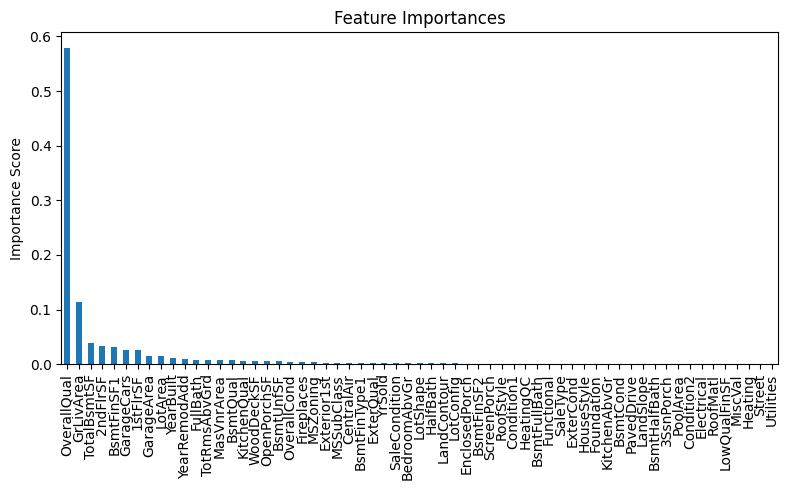

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier plotting
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
feat_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [42]:
important_features = feat_importances[feat_importances >= 1e-3].index


X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

In [47]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train_filtered, y_train)

# Make predictions
test_preds = model.predict(X_test_filtered)

# Example: Save predictions to CSV
submission = pd.DataFrame({
    "Id": test_data["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)
